In [1]:
#plot setup with three stacked subplots
from matplotlib.widgets import Slider, Button
from PRBM import * 
import sympy as sm
import numpy as np
import matplotlib.pyplot as plt
from functools import partial

%matplotlib widget
def h2_ideal(l1, h1): return np.sqrt(l1**2+h1**2)-l1

In [2]:
sm.simplify(F1)

1.0*k_theta*l1*(atan(h1/l1) + atan((d1 - h1)/l1))/(l1**2 + (d1 - h1)**2)

KeyError: 'F1l'

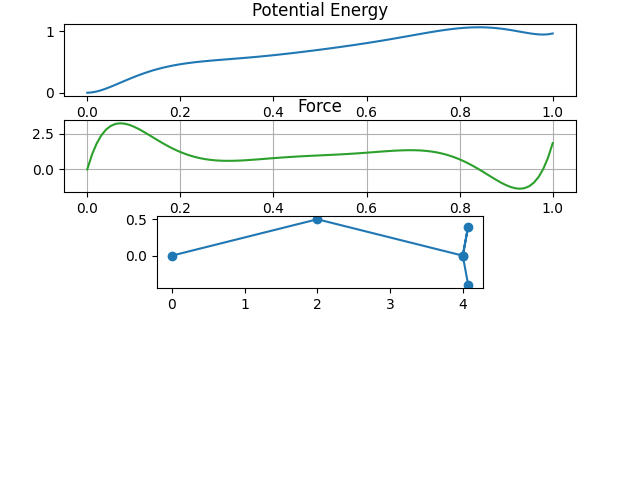

In [3]:
plt.clf()
repl['l1']=2
def plotsetup(d1=0):
    fig= plt.Figure(figsize=(8,8))
#add axes
    ax1 = plt.axes([0.1,0.8,0.8,0.15])
    ax2 = plt.axes([0.1,0.6,0.8,0.15])
    ax3 = plt.axes([0.1,0.4,0.8,0.15])

    ax1.set_title("Potential Energy")
    ax2.set_title("Force")
    ax2.grid('on')
    repl['h2'] = 1.2*h2_ideal(repl['l1'], repl['h1'])
    init = evaluate(**repl)
    
    
    #find roots of the force
    evald  = partial(evaluate,**repl)

    dFroots = find_roots(lambda d1: evald(d1)['dF'], 0, 1,n=10)
    Froots = find_roots(lambda d1: evald(d1)['F'], 0, 1,n=10)

    #add points to the force plot at each root of df, with the x value being the root and the y value being the force at that root
    extrema = ax2.plot(list(dFroots),[evaluate(d1=d1,**repl2)['F'] for d1 in dFroots],'o')
    equilibria = ax2.plot(list(Froots),[evaluate(d1=d1,**repl2)['F'] for d1 in Froots],'o')

#plot the mechanism
    mechanism = ax3.plot(init['x'],init['y'],'-o')
    #set aspect ratio to 1
    ax3.set_aspect('equal')
#plot the potential energy
    d1s = np.linspace(0,1,100)
#copy the dictionary and add the d1 values
    repl2 = repl.copy()
    repl2['d1'] = d1s
    init2 = evaluate(**repl2)

    PE_pl = ax1.plot(d1s,init2['PE'])

#plot the force
    F_pl = ax2.plot(d1s,init2['F'])
    F1_pl = ax2.plot(d1s,init2['F1l'])
    F2_pl = ax2.plot(d1s,init2['F2l'])
    F3_pl = ax2.plot(d1s,init2['F3l'])
    

#plot the potential energy components on the same plot
    PE1_pl=ax1.plot(d1s,init2['PE1'])
    PE2_pl=ax1.plot(d1s,init2['PE2'])
    PE3_pl=ax1.plot(d1s,init2['PE3'])

#add a vertical line to the plots for the current d1
    vline1 = ax1.axvline(d1,color='k')
    vline2 = ax2.axvline(d1,color='k')

#define the sliders
    axcolor = 'lightgoldenrodyellow'
    axl1 = plt.axes([0.25, 0.09, 0.65, 0.03], facecolor=axcolor)
    axl2 = plt.axes([0.25, 0.12, 0.65, 0.03], facecolor=axcolor)

    axh1 = plt.axes([0.25, 0.15, 0.65, 0.03], facecolor=axcolor)
    axh2 = plt.axes([0.25, 0.18, 0.65, 0.03], facecolor=axcolor)

    axk_theta = plt.axes([0.25, 0.21, 0.65, 0.03], facecolor=axcolor)
    axk_phi = plt.axes([0.25, 0.24, 0.65, 0.03], facecolor=axcolor)
    axk_L = plt.axes([0.25, 0.27, 0.65, 0.03], facecolor=axcolor)

    axd1 = plt.axes([0.25, 0.3, 0.65, 0.03], facecolor=axcolor)


# Create a `matplotlib.widgets.Button` to reset the sliders to initial values.
    resetax = plt.axes([0.8, 0.025, 0.1, 0.04])
    button = Button(resetax, 'Reset', color=axcolor, hovercolor='0.975')

    sl1 = Slider(axl1, 'l1', 0, 2*repl['l1'], valinit=repl['l1'])
    sl2 = Slider(axl2, 'l2', 0, 2*repl['l2'], valinit=repl['l2'])
    sh1 = Slider(axh1, 'h1', 0, 2*repl['h1'], valinit=repl['h1'])
    sh2 = Slider(axh2, 'h2', 0, 2*repl['h2'], valinit=repl['h2'])
    sk_theta = Slider(axk_theta, 'k_theta', 0, 2*repl['k_theta'], valinit=repl['k_theta'])
    sk_phi = Slider(axk_phi, 'k_phi', 0, 2*repl['k_phi'], valinit=repl['k_phi'])
    sk_L = Slider(axk_L, 'k_L', 0, 2*repl['k_L'], valinit=repl['k_L'])
    sd1 = Slider(axd1, 'd1', 0, 1, valinit=d1)
    return fig,mechanism,d1s,PE_pl,F_pl,PE1_pl,PE2_pl,PE3_pl,vline1,vline2,button,sl1,sl2,sh1,sh2,sk_theta,sk_phi,sk_L,sd1, extrema, equilibria

fig, mechanism, d1s, PE_pl, F_pl, PE1_pl, PE2_pl, PE3_pl, vline1, vline2, button, sl1, sl2, sh1, sh2, sk_theta, sk_phi, sk_L, sd1, extrema, equilibria= plotsetup()



from functools import lru_cache

@lru_cache(maxsize=None)
def evaluate_cached(d1, l1, l2, h1, h2, k_theta, k_phi, k_L):
    return evaluate(l1, l2, h1, h2, k_theta, k_phi, k_L, d1)

def update(val):
    # Update the parameters
    repl['l1'] = sl1.val
    repl['l2'] = sl2.val
    repl['h1'] = sh1.val

    
    # repl['h2'] = sh2.val
    repl['h2'] = 1.2*h2_ideal(repl['l1'], repl['h1'])
    repl['k_theta'] = sk_theta.val
    repl['k_phi'] = sk_phi.val
    repl['k_L'] = sk_L.val
    d1 = sd1.val

    # Evaluate the new mechanism
    new = evaluate(**repl)


    dFroots = find_roots(lambda d1: evaluate_cached(d1, **repl)['dF'], 0, 1, n=10)

    # Update extrema plot
    extrema[0].set_xdata(list(dFroots))
    extrema[0].set_ydata([evaluate_cached(d1, **repl)['F'] for d1 in dFroots])

    # Update equilibrium plot
    Froots = find_roots(lambda d1: evaluate_cached(d1, **repl)['F'], 0, 1, n=10)
    equilibria[0].set_xdata(list(Froots))
    equilibria[0].set_ydata([evaluate_cached(d1, **repl)['F'] for d1 in Froots])


    # Update the mechanism plot
    mechanism[0].set_data(new['x'], new['y'])

    # Update the vertical line
    vline1.set_xdata(d1)
    vline2.set_xdata(d1)


    new2 = evaluate(d1= d1s,**repl)
    #update the potential energy plot
    PE_pl[0].set_ydata(new2['PE'])
    PE1_pl[0].set_ydata(new2['PE1'])
    PE2_pl[0].set_ydata(new2['PE2'])
    PE3_pl[0].set_ydata(new2['PE3'])
    #update the force plot
    F_pl[0].set_ydata(new2['F'])
    #update the plots
    fig.canvas.draw_idle()

# register the update function with each slider

def register_updates(sl1, sl2, sh1, sh2, sk_theta, sk_phi, sk_L, sd1, update):
    sl1.on_changed(update)
    sl2.on_changed(update)
    sh1.on_changed(update)
    sh2.on_changed(update)
    sk_theta.on_changed(update)
    sk_phi.on_changed(update)
    sk_L.on_changed(update)
    sd1.on_changed(update)

register_updates(sl1, sl2, sh1, sh2, sk_theta, sk_phi, sk_L, sd1, update)

def reset(event):

    sl1.reset()
    sl2.reset()
    sh1.reset()
    sh2.reset()
    sk_theta.reset()
    sk_phi.reset()
    sk_L.reset()
    sd1.reset()

button.on_clicked(reset)
plt.show()

In [4]:
gamma = 1/5
lam = 1/6


def evalgeom(lam,repl,gamma=1/5,h1_scale=12.5, t =0.8, kL= 3):

    #evaluates the geometry of the mechanism for a given set of design parameters

    #rescale repl based on h1 scale
    repl['l1'] = repl['l1']*h1_scale/repl['h1']
    repl['l2'] = repl['l2']*h1_scale/repl['h1']
    repl['h2'] = repl['h2']*h1_scale/repl['h1']
    repl['h1'] = h1_scale
    

    #calculate the length of the link
    Lp1 = L1_l(**repl)
    Lp2 = L2_l(**repl)

    
    
    #calculate the length of the spring
    Ls_1 = lam*(1-lam)*Lp1
    Ls_2 = lam*(1-lam)*Lp2

    #calculate the length of the reinfocement
    LRF_1 = Lp1 - Ls_1
    LRF_2 = Lp2 - Ls_2

    T= t/gamma

    #creat dict with the lengths of spring and reinforcement
    Ls = {'Ls_1':Ls_1,'Ls_2':Ls_2,'T':T,'t':t,"kL":kL}

    geom = {"L1":repl["l1"],"L2":repl["l2"],
        "H1":repl["h1"],"H2":repl["h2"],
        "fl1":Ls["Ls_1"],"fl2":Ls["Ls_2"],'Trf':Ls['T'],'t':Ls['t'],
        'kL':Ls['kL']}

    return geom

# geom = evalgeom(lam, repl, h1_scale=10, t=0.8, kL = 3)

# geom


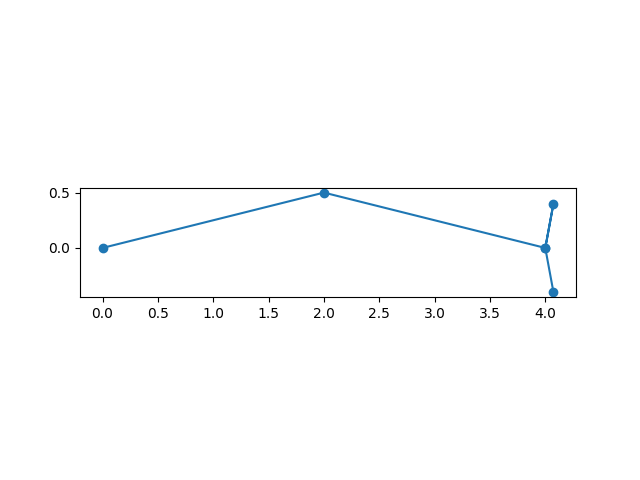

In [5]:
plt.clf()
# plot mechanism
init = evaluate(d1=0, **repl)
fig, ax = plt.subplots()
ax.set_aspect('equal')
mechanism = ax.plot(init['x'],init['y'],'-o')
